In [88]:
#thư viện
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import glob
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [89]:
# class loc:
#     def __init__(self,x,y,bias = True):
#         self.x = x
#         self.y = y
#         if(bias):
#             self.x = np.hstack((np.ones((x.shape[0],1)),x))
#         self.w = np.zeros((self.x.shape[1],1))
#         # scaler = MinMaxScaler()
#         # self.x_scaled = scaler.fit_transform(self.x)
#         self.x_max = self.x.max(axis = 0, keepdims = True)
#         self.x_min = self.x.min(axis = 0, keepdims = True)
#         self.x_scaled = (self.x-self.x_min)/(self.x_max-self.x_min)
#         # self.y_scaled = self.y
# #Y dự đoán
# g = lambda z :np.exp(z) / (1+np.exp(z))
# def predict(x,w):
#     # print(x.shape,w.shape)
#     z = np.dot(x,w)
#     return g(z)

# def predict_(x,w):
#     y_pre = predict(x,w)
#     y_pre[y_pre >= 0.5] = 1
#     y_pre[y_pre < 0.5] = 0
#     return y_pre

# #Hàm Loss
# def loss(x,y,w):
#     y_pred = predict(x,w)
#     dy = y*np.log(y_pred+1e-12)+(1-y)*np.log(1-y_pred+1e-12)
#     return -np.mean(dy,axis=0,keepdims= False)


# def gradient(x,y,w):
#     y_pred = predict(x,w)
#     dy = y_pred-y
#     dw = np.dot(x.T,dy)
#     return dw


# def gradDescent(x,y,w,lr=0.1,epochs=1000):
#     history = []
#     for i in range(epochs):
#         dw = gradient(x,y,w)
#         w = w-lr*dw
#         l = loss(x,y,w)
#         history.append(l)
#     return history,w

In [90]:
# data = pd.read_csv('D:\Learning\machine_learning\Hoc_May_CK\Hoc_May_CK\data.csv')
# x = data.loc[:,['IoU','x0','y0','w0','h0','xb','yb','wb','hb']]
# y = data.loc[:,['select']]

# x_max = x.values.max(axis = 0, keepdims = True)
# x_min = x.values.min(axis = 0, keepdims = True)
# x_scaled = (x-x_min)/(x_max-x_min)
# pr = loc(x,y)
# print(x_scaled.shape)
# print(pr.x_scaled.shape)


In [91]:
# history,w = gradDescent(pr.x_scaled,pr.y_scaled,pr.w,0.5,1000)
# plt.plot(history)
# plt.title('Lịch sử độ lỗi')
# plt.xlabel('Epoch')
# plt.ylabel('Độ lỗi')
# plt.show()

In [92]:
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# # Dữ liệu dự đoán và nhãn thực tế
# y_pred = predict_(pr.x_scaled,w)
# y_true = pr.y_scaled

# # Tính toán accuracy
# accuracy = accuracy_score(y_true, y_pred)
# print("Accuracy:", accuracy)

# # Tính toán recall
# recall = recall_score(y_true, y_pred)
# print("Recall:", recall)

# # Tính toán precision
# precision = precision_score(y_true, y_pred)
# print("Precision:", precision)

# # # Tính toán F1-score
# f1 = f1_score(y_true, y_pred)
# print("F1-score:", f1)


In [93]:
# def dectect(img):
img = cv2.imread('data/test/download.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, gray = cv2.threshold(gray,100, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contour_image = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
# plt.imshow(contour_image)
# Tìm ra diện tích của toàn bộ các contours
area_cnt = [cv2.contourArea(cnt) for cnt in contours]
area_sort = np.argsort(area_cnt)[::-1]
# Top 5 contour có diện tích lớn nhất
area_sort[:5]
listdata = [['i','IoU','x0','y0','w0','h0','xb','yb','wb','hb']]
listdata.clear()
for i in range(10):
    IoU = area_cnt[area_sort[0]]/area_cnt[area_sort[i]]
    cnt0 = contours[area_sort[0]]
    x0,y0,w0,h0 = cv2.boundingRect(cnt0)
    cntb = contours[area_sort[i]]
    xb,yb,wb,hb = cv2.boundingRect(cntb)       
    list = [i,IoU,x0,y0,w0,h0,xb,yb,wb,hb]
    listdata.append(list)
    # scaler = MinMaxScaler()
    # list = scaler.fit_transform(list)
    # print(predict_(list,bw))
    cnt = contours[area_sort[i]]
    x,y,w,h = cv2.boundingRect(cnt)
    # img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    # plt.imshow(img)
listdata = np.array(listdata)

7.196174863387978
centroid: (90, 122), (width, height): (101, 21)


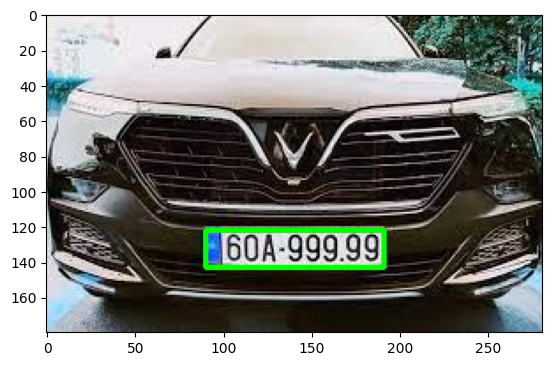

In [94]:
k = 1
cnt = contours[area_sort[k]]
x,y,w,h = cv2.boundingRect(cnt)
IoU = area_cnt[area_sort[0]]/area_cnt[area_sort[k]]
print(IoU)
print('centroid: ({}, {}), (width, height): ({}, {})'.format(x, y, w, h))
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

In [95]:
csv_file = 'listdata.csv'
with open(csv_file, 'r+', newline='') as file:
    writer = csv.writer(file)

    # Ghi dữ liệu vào file CSV
    writer.writerows(listdata)

print("Dữ liệu đã được ghi vào file CSV thành công.")

Dữ liệu đã được ghi vào file CSV thành công.


In [96]:
# img = cv2.imread('data/test.jpg')
# dectect(img)